In [1]:
import pandas as pd
from ast import literal_eval
import sys
sys.path.insert(0,'/home/jorghyq/Projects/Nanonis-Gui/nbrowser')
#sys.path.insert(0,'/home/jorghyq/Projects/Nanonis-Gui/')
from nanonisfile import NanonisFile
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
from utils import extract_data
from utils import process_img
from skimage.transform import resize

Populating the interactive namespace from numpy and matplotlib


In [2]:
def open_file(fname):
    if fname[-3:] == 'csv':
        data_name = fname
        print fname
        data = pd.read_csv(fname,converters={'process':literal_eval},index_col=0)
        #print type(self.data)
        #print self.data.shape
        columns = data.columns
    return data

def save_file(fname):
    data.to_csv(self.data_name)

def remove_dir(fullpath):
    split = fullpath.split('/')
    return '/'.join(split[-3:])

In [3]:
data2 = pd.read_csv('/home/jorghyq/Dropbox/test.csv', converters={'process':literal_eval},index_col=0)

In [26]:
(data2.loc[data2['filename'] == 'A151202.210930-01875.sxm'])['fullpath'].iloc[0]

'Data/201512/A151202.210930-01875.sxm'

In [5]:
test = data2['fullpath']
temp1 = data2.loc[(data2['complete'] == True) & (data2['square'] == True) & (data2['good'] >= 2) & \
                  (data2['ratio'] < 500) & (data2['pixel1'] <= 512)]
print temp1

                       filename  ftype  fformat  pixel1  pixel2  size1[nm]  \
3987   A151202.210930-01875.sxm      2        0     160     160         20   
4076   A151204.135121-01964.sxm      2        0     256     256         40   
4078   A151204.141810-01966.sxm      2        0     512     512         40   
4103   A151204.181912-01991.sxm      2        0     256     256         40   
4105   A151204.185156-01993.sxm      2        0     512     512         40   
4118   A151204.211536-02006.sxm      2        0     256     256         40   
4119   A151204.211853-02007.sxm      2        0     256     256         40   
6210   A151118.113006-00756.sxm      2        0     512     512         80   
6211   A151118.113721-00757.sxm      2        0     512     512         50   
6242   A151118.183950-00788.sxm      2        0     256     256         40   
6292   A151119.223242-00838.sxm      2        0     512     512         50   
6293   A151119.224442-00839.sxm      2        0     256     256 

['Data/201604/A160401.095948-00001.sxm',
 'Data/201604/A160401.102125-00002.sxm',
 'Data/201604/A160401.104612-00003.sxm',
 'Data/201604/A160401.105414-00004.sxm',
 'Data/201604/A160401.105921-00005.sxm',
 'Data/201604/A160401.111506-00006.sxm',
 'Data/201604/A160401.113136-00007.sxm',
 'Data/201604/A160401.115340-00008.sxm',
 'Data/201604/A160401.115932-00009.sxm',
 'Data/201604/A160401.121724-00010.sxm',
 'Data/201604/A160401.141109-00011.sxm',
 'Data/201604/A160401.143924-00012.sxm',
 'Data/201604/A160401.145203-00013.sxm',
 'Data/201604/A160401.150818-00014.sxm',
 'Data/201604/A160401.151817-00015.sxm',
 'Data/201604/A160401.152449-00016.sxm',
 'Data/201604/A160401.153304-00017.sxm',
 'Data/201604/A160401.154930-00018.sxm',
 'Data/201604/A160401.160048-00019.sxm',
 'Data/201604/A160404.100228-00020.sxm',
 'Data/201604/A160404.101205-00021.sxm',
 'Data/201604/A160404.101741-00022.sxm',
 'Data/201604/A160404.102902-00023.sxm',
 'Data/201604/A160404.103658-00024.sxm',
 'Data/201604/A1

In [30]:
# two arrays: data and label
def construct_data(df, label, pre_dir = None):
    # loop over the data
    data = np.zeros((512,512,df.shape[0]))
    size = np.array(df['pixel1']).astype(int)
    #print size
    i = 0
    for ind, row in df.iterrows():
        #print i
        full_path = pre_dir + row['fullpath']
        im = extract_data(full_path, 0)
        data[:size[i],:size[i],i] = im
        i = i + 1
    label = np.array(df[label]).astype(int)
    return data, size, label
        

In [33]:
pre_dir = '/run/media/jorghyq/数据/'
data, size, label = construct_data(temp1,'type',pre_dir)

In [34]:
label

array([  123,    23,    23,    23,    23,   235,   235,   123,   123,
         256,    34,  1234,   134,   134,  1234,  1234,  1234,  1234,
        1234,  1234,  3456, 13456,  1345,   135,  1345,   357,     3,
       12356, 13456, 13456,    35,    36,    36,  1345,  1356,     5,
         135, 13456,  1345,  1345,    35,  1345,  1345,    35,   135,
         135,   135,    35,   135,  1345,    34,    34,   345,  1345,
         345,   345,   345,  1345,   345,    35,    34,   345,    34,
          34,     3,   356,     3,    36,     3,     3,     3,    35,
         345,    34,   345,    34,    34,    34,  3456,    34,    34,
         345,   345,    34,    34,    34,    34,    34,  3456,    34,
         345,     3,    35,   345,     3,    34,     3,     3,     3,
          34,   345,    45,  3456,  3456,   345,     3])

In [ ]:
print temp1['fullpath'].iloc[0]
data = NanonisFile(pre_dir + temp1['fullpath'].iloc[0])
data.data[0].data.shape

(512, 512)


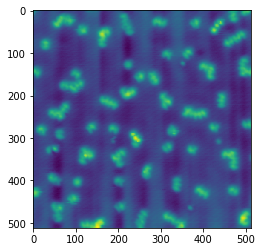

In [15]:
#print pre_dir + test
im = extract_data(pre_dir+temp1['fullpath'].iloc[2],0)
print im.shape
plt.imshow(process_img(im,3))

(128, 128)


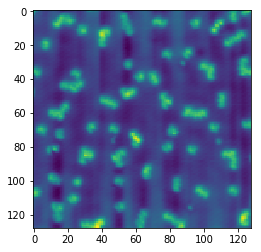

In [14]:
im2 = resize(im,(128,128))
print im2.shape
plt.imshow(process_img(im2,3))

(128, 128)


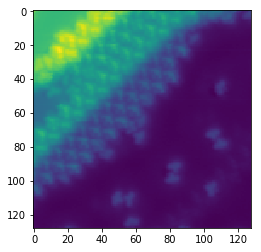

In [34]:
def process_img(data, process_id):                                               
    if process_id == 0:                                                          
        pass                                                                     
    # subtract mean                                                              
    elif process_id == 1:                                                        
        row_mean = np.mean(data,axis=0)                                          
        data = (data - row_mean)                                                 
    # subtract slope                                                             
    elif process_id == 2:                                                        
        #print data.shape                                                        
        data_temp = data                                                         
        n = data_temp.shape[0]                                                   
        m = data_temp.shape[1]                                                   
        #print n, m                                                              
        xi = np.arange(n)                                                        
        x= np.array([xi,np.ones(n)]).T                                           
        w = np.linalg.lstsq(x,data_temp)[0]                                      
        X = np.array([xi,]*int(m)).T                                             
        Y = (X*w[0])                                                             
        data = data - Y                                                          
        #print data.shape                                                        
    # subtract linear fit                                                        
    elif process_id == 3:                                                        
        data_temp = data                                                         
        n = data_temp.shape[0]                                                   
        m = data_temp.shape[1]                                                   
        xi = np.arange(n)                                                        
        x= np.array([xi,np.ones(n)]).T                                           
        w = np.linalg.lstsq(x,data_temp)[0]                                      
        X = np.array([xi,]*int(m)).T                                             
        Y = (X*w[0] + w[1])                                                      
        data = data - Y
    elif process_id == 4:
        data_temp = data                                                         
        n = data_temp.shape[0]                                                   
        m = data_temp.shape[1]
        xi = np.arrange(n)
        x = np.array([xi,1])
        for i in range(n):
            w = np.linalg.lstsq(x,data_temp[i,:])[0]
            X = xi*
            
            
            
    else:                                                                        
        pass                                                                     
    return data    

In [91]:
s2 = s1.astype('str')
s2

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
        ... 
29962    1.0
29963    1.0
29964    1.0
29965    1.0
29966    1.0
29967    1.0
29968    1.0
29969    1.0
29970    1.0
29971    1.0
29972    1.0
29973    1.0
29974    1.0
29975    1.0
29976    1.0
29977    1.0
29978    1.0
29979    1.0
29980    1.0
29981    1.0
29982    1.0
29983    1.0
29984    1.0
29985    1.0
29986    1.0
29987    1.0
29988    1.0
29989    1.0
29990    1.0
29991    1.0
Name: good, dtype: object

In [92]:
data2['good'] = s2

In [93]:
data2

,filename,ftype,fformat,pixel1,pixel2,size1[nm],size2[nm],ratio,square,complete,quality,type,flat,clean,fullpath,good,process,read
0,A160401.095948-00001.sxm,2,0,512,512,100,100,26.2,True,True,56,12,4,6,/home/jorghyq/Data/201604/A160401.095948-00001...,1.0,"[{u'Z_(m)_F': [3, (-2.1664792437569167e-10, 3....",1
1,A160401.102125-00002.sxm,2,0,512,512,100,100,26.2,True,False,0,0,0,0,/home/jorghyq/Data/201604/A160401.102125-00002...,1.0,"[{u'Z_(m)_F': [0, (1.7255621e-09, 3.7873549e-0...",1
2,A160401.104612-00003.sxm,2,0,512,512,100,100,26.2,True,False,0,0,0,0,/home/jorghyq/Data/201604/A160401.104612-00003...,1.0,"[{u'Z_(m)_F': [0, (2.3787916e-09, 4.5502073e-0...",1
3,A160401.105414-00004.sxm,2,0,512,512,100,100,26.2,True,False,0,0,0,0,/home/jorghyq/Data/201604/A160401.105414-00004...,1.0,"[{u'Z_(m)_F': [0, (2.575429e-09, 4.5887081e-09...",1
4,A160401.105921-00005.sxm,2,0,512,512,100,100,26.2,True,False,0,0,0,0,/home/jorghyq/Data/201604/A160401.105921-00005...,1.0,"[{u'Z_(m)_F': [0, (2.4445643e-09, 3.4259129e-0...",1
5,A160401.111506-00006.sxm,2,0,512,512,100,100,26.2,True,False,0,0,0,0,/home/jorghyq/Data/201604/A160401.111506-00006...,1.0,"[{u'Z_(m)_F': [0, (2.6241229e-09, 6.4696617e-0...",1
6,A160401.113136-00007.sxm,2,0,512,512,100,100,26.2,True,False,0,0,0,0,/home/jorghyq/Data/201604/A160401.113136-00007...,1.0,"[{u'Z_(m)_F': [0, (3.0305298e-09, 3.7453836e-0...",1
7,A160401.115340-00008.sxm,2,0,512,512,100,100,26.2,True,False,0,0,0,0,/home/jorghyq/Data/201604/A160401.115340-00008...,1.0,"[{u'Z_(m)_F': [3, (-1.3742179674334927e-10, 2....",1
8,A160401.115932-00009.sxm,2,0,512,512,20,20,655.4,True,False,0,0,0,0,/home/jorghyq/Data/201604/A160401.115932-00009...,1.0,"[{u'Z_(m)_F': [3, (-3.1279393102778048e-09, 4....",1
9,A160401.121724-00010.sxm,2,0,512,512,100,100,26.2,True,False,0,0,0,0,/home/jorghyq/Data/201604/A160401.121724-00010...,1.0,"[{u'Z_(m)_F': [3, (-1.3897432578392457e-10, 2....",1


In [43]:
data2.to_csv('/home/jorghyq/Dropbox/test.csv')

In [98]:
import numpy as np

In [99]:
a = np.array([1,2])

In [100]:
b = [a]

In [101]:
b

[array([1, 2])]